In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from collections import Counter
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy.matlib
from sklearn.tree import DecisionTreeClassifier

In [2]:
############Question3#############

In [3]:
#Create data frame

data = np.array([[4,2.9,1,0.414],
                [4,4,1,0],
                [1,2.5,-1,0],
                [2.5,1,-1,0.018],
                [4.9,4.5,1,0],
                [1.9,1.9,-1,0],
                [3.5,4,1,0.018],
                [0.5,1.5,-1,0],
                [2,2.1,-1,0.414],
                [4.5,2.5,1,0]])

columns = ['Xi1','Xi2','yi','ai']








In [4]:
data.shape

(10, 4)

In [5]:
df = pd.DataFrame(data,columns=columns)

In [6]:
df.head()

,Xi1,Xi2,yi,ai
0,4.0,2.9,1.0,0.414
1,4.0,4.0,1.0,0.000
2,1.0,2.5,-1.0,0.000
3,2.5,1.0,-1.0,0.018
4,4.9,4.5,1.0,0.000


In [7]:
#split data into x and y
dfX = df.iloc[:,:2]
dfy= df.iloc[:,2]

In [8]:
dfy.head()


0    1.0
1    1.0
2   -1.0
3   -1.0
4    1.0
Name: yi, dtype: float64

In [9]:
#setup svm
svm_model = svm.SVC(kernel='linear', C=1e5, degree=1)
svm_model


SVC(C=100000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [10]:
#fit the data
svm_model.fit(dfX,dfy)

SVC(C=100000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [11]:
#see score 
svm_model.score(dfX,dfy)

1.0

In [12]:
#return the number of suppor vectors 

svm_model.n_support_

array([2, 1])

In [13]:
#find index of support vectors
svm_index = svm_model.support_
svm_index

array([3, 8, 0])

In [14]:
#Find value of the support vectors
support = svm_model.support_vectors_
support

array([[2.5, 1. ],
       [2. , 2.1],
       [4. , 2.9]])

In [15]:
#find the Lagragian multiplier x label in array
alpha = np.abs(svm_model.dual_coef_)
alpha

array([[0.03615281, 0.3956072 , 0.43176   ]])

In [16]:
#find class weightrs
weights =  svm_model.coef_
weights

array([[0.84544361, 0.38517609]])

In [17]:
intercept = svm_model.intercept_
intercept

array([-3.49910903])

In [18]:
#linear svm equation wT x+b
lin = weights.dot(dfX.iloc[0])+intercept
lin

array([0.99967606])

In [19]:
def plot_model(model, x, y, label):   
    '''
    model: a fitted model
    x, y: two variables, should arrays
    label: true label
    '''
    margin = 0.5
    x_min = x.min() - margin
    x_max = x.max() + margin
    y_min = y.min() - margin
    y_max = y.max() + margin
    import  matplotlib.pyplot as plt
    from matplotlib import colors
    col_dict = {
        'red': [(0, 1, 1), (1, 0.7, 0.7)],
        'green': [(0, 1, 0.5), (1, 0.7, 0.7)],
        'blue': [(0, 1, 0.5), (1, 1, 1)]
    }
    cmap = colors.LinearSegmentedColormap('red_blue_classes', col_dict)
    plt.cm.register_cmap(cmap=cmap)
    nx, ny = 200, 200
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, nx),
        np.linspace(y_min, y_max, ny)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ## plot colormap
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes')
    ## plot boundaries
    plt.contour(xx, yy, Z, [0.5], linewidths=1., colors='k')
    plt.contour(xx, yy, Z, [1], linewidths=1., colors='k')
    ## plot scatters and true labels
    plt.scatter(x, y, c=label, edgecolors='k')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    ## if it's a SVM model
    if hasattr(model, 'support_'):
        # if it's a SVC, plot the support vectors
        index = model.support_
        plt.scatter(x[index], y[index], c=label[index], s=200, alpha=0.33, edgecolors='k')

<ipython-input-19-3518eeaba0ad>:32: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z, [1], linewidths=1., colors='k')


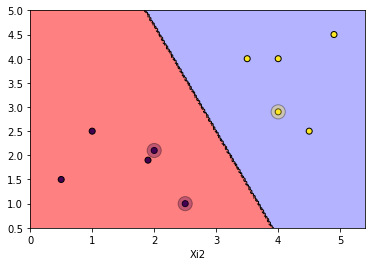

In [20]:
#plt.scatter(dfX.iloc[:,0], dfX.iloc[:,1])
plot_model(svm_model,dfX.iloc[:, 0], dfX.iloc[:,1],dfy)
plt.xlabel('Xi1')
plt.xlabel('Xi2')
plt.show()

In [21]:
%%HTML
<h3> Question 1 </h3>

In [22]:
#Question 1 what is the equation of the hyper plane h(x)
#Plot it

#The equation of the hyperplane is the line equation W.T.X+ b =0


In [23]:
#Question b What is the distance of x6 from the hyper plane
#the distance between a point and the hyperplane is given by
# dist = W.T.X +b / ||w||
#hyper2 = weights.T.dot(dfX)+intercept
hyper = svm_model.decision_function(dfX)
w_norm = np.linalg.norm(weights)

In [24]:
hyper.shape

(10,)

In [25]:
dist = hyper/w_norm

In [26]:
dist.shape

(10,)

In [27]:
#Distance for X6 os -1.24 and this is beyond the margin of the classifier
dist[5]

-1.249588850480849

In [28]:
#Classify new point z = (3,3)
test_data = np.array([[3,3]])
columns = ['Xi1','XI2']
test_data.shape

(1, 2)

In [29]:
dfx_test = pd.DataFrame(data=test_data,columns=columns)

In [30]:
#predict class of test data
svm_model.predict(dfx_test)

array([1.])

In [31]:
#Test Data belongs to class 1

In [32]:
%%html
<h3> Gaussian Process </h3>

In [33]:
########Gaussian Process ##########
#y = f(x) + e
#f = GP(0,k)
#e = N(0, sigma^2)
#k(x,x') = exp(-1/2(x-x')^2)


In [34]:
###Questions
#What is X and X'?
#what is the sample size?

In [35]:
#define x
x = dfX.iloc[0]
x_p = dfX.iloc[1]

In [36]:
#define e 
mu = 0
sigma = 1
#sigma is covariance matrix

e = np.random.normal(0)

In [37]:
kernel = np.exp((1/2)*((x-x_p)**2))


In [38]:

#make function to predict 

def f(x):
    return

In [39]:
%%HTML
<h3> Decision Tree </h3>

In [40]:
#######decision Tree#######

In [41]:
data = 'auto-mpg.data'
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']
dfauto = pd.read_csv(data, delim_whitespace=True, names =columns)

In [42]:
dfauto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [43]:
#check dfauto for missing values
dfauto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [44]:
#check types for columns 
dfauto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [45]:
#check types for columns 
dfauto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [46]:
#check dfauto for missing values
dfauto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [47]:
#Horsepower has one NAN value as ?. replace it with np.NAN
dfauto['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [48]:
#np.mean(dfauto['horsepower'])

In [49]:
#replace ? with np.nan
dfauto['horsepower'].replace('?',np.nan, inplace=True)

In [50]:
#Horsepower is an obect and should be a float 64
#dfauto['horsepower'] = dfauto['horsepower'].astype('float64')

In [51]:
#change types of df auto
dfauto['mpg'] =dfauto['mpg'].astype('float64')
dfauto['cylinders'] = dfauto['cylinders'].astype('int64')
dfauto['displacement'] = dfauto['displacement'].astype('float64')
dfauto['horsepower'] = dfauto['horsepower'].astype('float64')
dfauto['weight'] = dfauto['weight'].astype('float64')
dfauto['acceleration'] = dfauto['acceleration'].astype('float64')
dfauto['year'] = dfauto['year'].astype('int64')
dfauto['origin'] = dfauto['origin'].astype('int64')

In [52]:
#replace nann with npmean
dfauto['horsepower'].replace(np.nan, np.mean(dfauto['horsepower']), inplace=True)

In [53]:
#dfauto[dfauto['horsepower'] == '?']

In [54]:
#check to see that ? was correctly replaced
dfauto['horsepower'].unique()

array([130.        , 165.        , 150.        , 140.        ,
       198.        , 220.        , 215.        , 225.        ,
       190.        , 170.        , 160.        ,  95.        ,
        97.        ,  85.        ,  88.        ,  46.        ,
        87.        ,  90.        , 113.        , 200.        ,
       210.        , 193.        , 104.46938776, 100.        ,
       105.        , 175.        , 153.        , 180.        ,
       110.        ,  72.        ,  86.        ,  70.        ,
        76.        ,  65.        ,  69.        ,  60.        ,
        80.        ,  54.        , 208.        , 155.        ,
       112.        ,  92.        , 145.        , 137.        ,
       158.        , 167.        ,  94.        , 107.        ,
       230.        ,  49.        ,  75.        ,  91.        ,
       122.        ,  67.        ,  83.        ,  78.        ,
        52.        ,  61.        ,  93.        , 148.        ,
       129.        ,  96.        ,  71.        ,  98.  

In [55]:
#Check that horsepower has been changed to float 64
dfauto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [56]:
dfauto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001490388F910>,
      dtype=object)

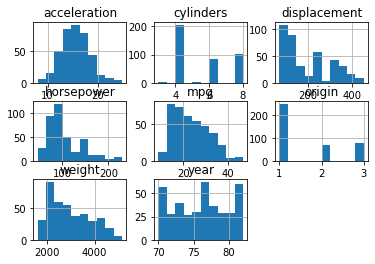

In [57]:
#plot distribution of features
dfauto.hist()

In [58]:
#Origin can be changed from  1, 2, 3, to America, Eurpoe, Asia
dfauto['origin'].unique()

array([1, 3, 2], dtype=int64)

In [59]:
#change values of origin
# dfauto['origin'].replace(1,'America',inplace=True)
# dfauto['origin'].replace(2,'Europe', inplace=True)
# dfauto['origin'].replace(3,'Asia', inplace=True)

In [60]:
#Confirm values of origin
# dfauto['origin'].unique()

In [61]:
#Change MPG to a cutoff where above is good and below is bad
mpg_cut = (dfauto['mpg'].max() + dfauto['mpg'].min())/2
mpg_cut

27.8

In [62]:
# change values of mpg
dfauto['mpg'] = pd.cut(dfauto.mpg, bins=[dfauto.mpg.min()-1,mpg_cut,dfauto.mpg.max()], labels=[0,1])

In [63]:
#confirm values on mpg
dfauto['mpg'].unique()

[0, 1]
Categories (2, int64): [0 < 1]

In [64]:
#make a cut off for dipslacement accelration, weight, and horspower
def value_cut(data,feature):
    for feat in feature:
        feat_max=data[feat].max()
        feat_min=data[feat].min()
        feat_cut1=(feat_max+feat_min)/3
        data[feat]=pd.cut(dfauto[feat],bins=[feat_min,feat_cut1,feat_cut1*2,feat_max],labels=[0,1,2])
        print(feat,":",feat_min,feat_cut1,2*feat_cut1,feat_max)
        
    return data

In [65]:
value_cut(dfauto, ['displacement', 'acceleration', 'weight', 'horsepower'])

displacement : 68.0 174.33333333333334 348.6666666666667 455.0
acceleration : 8.0 10.933333333333332 21.866666666666664 24.8
weight : 1613.0 2251.0 4502.0 5140.0
horsepower : 46.0 92.0 184.0 230.0


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,0,8,1,1,1,1,70,1,chevrolet chevelle malibu
1,0,8,2,1,1,1,70,1,buick skylark 320
2,0,8,1,1,1,1,70,1,plymouth satellite
3,0,8,1,1,1,1,70,1,amc rebel sst
4,0,8,1,1,1,0,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,0,4,0,0,1,1,82,1,ford mustang gl
394,1,4,0,0,0,2,82,2,vw pickup
395,1,4,0,0,1,1,82,1,dodge rampage
396,1,4,0,0,1,1,82,1,ford ranger


In [66]:
dfauto['year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [67]:
#chage values for year
yearmin=dfauto.year.min()
yearmax=dfauto.year.max()
x=(yearmax-yearmin)/4
print(yearmin,yearmax,x)
yearlist=[yearmin-1,yearmin+4,yearmin+8,yearmax]
print(yearlist)

70 82 3.0
[69, 74, 78, 82]


In [68]:
dfauto['year'] = pd.cut(dfauto.year, bins=yearlist, labels=[0,1,2])

In [69]:
#check values for year
dfauto['year'].unique()

[0, 1, 2]
Categories (3, int64): [0 < 1 < 2]

In [70]:
dfauto.dtypes

mpg             category
cylinders          int64
displacement    category
horsepower      category
weight          category
acceleration    category
year            category
origin             int64
name              object
dtype: object

In [71]:
dfauto.isna().sum()

mpg             0
cylinders       0
displacement    1
horsepower      2
weight          1
acceleration    1
year            0
origin          0
name            0
dtype: int64

In [72]:
dfauto.dropna(0, inplace=True)

In [73]:
dfauto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [74]:
#change origin from categotical to numeric


In [75]:
#Split into X and Y
dfautoX = dfauto.iloc[:,:8]
dfautoY = dfauto.iloc[:,8]

In [76]:
#train test split
xTr, xTe, yTr,yTe = train_test_split(dfautoX,dfautoY, test_size=0.3)

In [77]:
#calculate Gini index to determine how to split first

def informationGained(L, metric='gini'):
    total = len(L)
    freq = map(lambda x: float(x) / total, list(Counter(L).values()))
    if metric == 'gini':
        scores = map(lambda x: x * (1 - x), freq)
    elif metric == 'entropy':
        scores = map(lambda x: -x * math.log(x, 2), freq)
    return sum(scores)

In [78]:
for i in dfauto.columns:
    L = list(dfauto[i])
    print(i, informationGained(L))

mpg 0.41815745003204946
cylinders 0.6278059424146482
displacement 0.5755556850481389
horsepower 0.5403337023871958
weight 0.4413366224449495
acceleration 0.08844343440229457
year 0.66385667760879
origin 0.5333281536300009
name 0.9955130819882282


In [79]:
#we can see that year has the highest informationgained and we will split on this first
dfauto.groupby(['year','mpg']).count()

cylinders  displacement  horsepower  weight  acceleration  origin  \
year mpg                                                                      
0    0          133           133         133     133           133     133   
     1           14            14          14      14            14      14   
1    0          100           100         100     100           100     100   
     1           28            28          28      28            28      28   
2    0           43            43          43      43            43      43   
     1           75            75          75      75            75      75   

          name  
year mpg        
0    0     133  
     1      14  
1    0     100  
     1      28  
2    0      43  
     1      75

In [80]:
#implement IGsplit

#function to split the data based on IG
def IGsplit(xTr, yTr):
    N,D = xTr.shape
    assert D > 0 # must have at least one dimension
    assert N > 1 # must have at least two samples
    
    bestloss = np.inf
    feature = np.inf
    cut = np.inf
    
    # YOUR CODE HERE
    #xTr = np.argsort(xTr, 0)
    for i in range(D):
        xTrindex = xTr[:,i].argsort()
        yTrsort = yTr[xTrindex] #yTr.argsort()
        xTrsort = xTr[xTrindex, i]
        #for y in xTrsort:
        for y in range(N-1):
        #for y in range(xTr.shape[0]):
            if xTrsort[y] != xTrsort[y+1]:
                yTrL = yTrsort[:y+1]   #yTr[:np.where(xTr[xTrsort,i] ==y)[0][0]]

                yTrR = yTrsort[y+1:] #yTr[np.where(xTr[xTrsort,i] ==y)[0][0]:]
                loss = imformationGained(yTrL)+informationGained(yTrR)
                if loss < bestloss:
                    bestloss = loss 
                    cut = (xTrsort[y]+xTrsort[y+1])/2
                    feature = i
        #N, = yTrL.shape
    #print('shape', N)
   # print('feature: ', feature)
   # print('cut:', cut)
   # print('bestloss: ', bestloss)
    #return None 
    
    
    
    return feature, cut, bestloss
    

In [81]:
#implement IGsplit

#function to split the data based on IG
def IGsplit(xTr, yTr):
    """Finds the best feature, cut value, and loss value.
    
    Input:
        xTr:     n x d matrix of data points
        yTr:     n-dimensional vector of labels
    
    Output:
        feature:  index of the best cut's feature
        cut:      cut-value of the best cut
        bestloss: loss of the best cut
    """
    N,D = xTr.shape
    assert D > 0 # must have at least one dimension
    assert N > 1 # must have at least two samples
    #print("N", N)
    #print("D", D)
    
    bestloss = np.inf
    feature = np.inf
    cut = np.inf
    
    # YOUR CODE HERE
    #xTr = np.argsort(xTr, 0)
    for i in range(D):
        xTrindex = xTr.iloc[:,i].argsort()
        yTrsort = yTr[xTrindex] #yTr.argsort()
        
       # print("index", xTrindex)
        xTrsort = xTr.iloc[xTrindex, i]
        xTrsort = xTrsort.reset_index()
        xTrsort.drop(['index'], axis =1, inplace=True)
        xTrsort = xTrsort.iloc[:,0]
        #print("shape: ", xTrsort.shape)
        #for y in xTrsort:
        for y in range(N-1):
        #for y in range(xTr.shape[0]):
            #print('i', i)
            #print("y: ", y)
           # print("xTrsort: ", xTrsort)
            #print("sort",xTrsort[y])
            if xTrsort[y] != xTrsort[y+1]:
                yTrL = yTrsort[:y+1]   #yTr[:np.where(xTr[xTrsort,i] ==y)[0][0]]

                yTrR = yTrsort[y+1:] #yTr[np.where(xTr[xTrsort,i] ==y)[0][0]:]
                loss = informationGained(yTrL)+informationGained(yTrR)
                if loss < bestloss:
                    bestloss = loss 
                    cut = (xTrsort[y]+xTrsort[y+1])/2
                    feature = i
        #N, = yTrL.shape
    #print('shape', N)
   # print('feature: ', feature)
   # print('cut:', cut)
   # print('bestloss: ', bestloss)
    #return None 
    
    
    
    return feature, cut, bestloss
    

In [82]:
#issues when i =3 y =390
IGsplit(xTr,yTr)

c:\users\kwaz9\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:1146: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


(1, 3.5, 1.5554804642445235)

In [83]:
#Create tree class to make decision tree
class TreeNode(object):

    
    def __init__(self, left, right, feature, cut, prediction):
        self.left = left 
        self.right = right 
        self.feature = feature 
        self.cut = cut
        self.prediction = prediction 

In [84]:
#create tree walk funciton and cisualize tree
def treeWalk(root):
    print("feat: ", root.feature, "cut: ", root.cut, "pred: ",root.prediction)
    if root.right==None and root.left ==None:
        #print ("pred", root.prediction)
        return root.prediction
    
    treeWalk(root.left)
    treeWalk(root.right)

In [85]:
def print_tree(node, depth=0):
	if isinstance(node, dict):
		print('%s[X%d < %.3f]' % ((depth*' ', (node['index']+1), node['value'])))
		print_tree(node['left'], depth+1)
		print_tree(node['right'], depth+1)
	else:
		print('%s[%s]' % ((depth*' ', node)))

In [86]:
#treeWalk(root)

In [87]:
#Build CART/Decision tree

def cart(xTr,yTr):
    """Builds a CART tree.
    
    The maximum tree depth is defined by "maxdepth" (maxdepth=2 means one split).
    Each example can be weighted with "weights".

    Args:
        xTr:      n x d matrix of data
        yTr:      n-dimensional vector

    Returns:
        tree: root of decision tree
    """
    n,d = xTr.shape
    
    # YOUR CODE HERE
    
    #Can you split it?
    #if yes leftnode = cart(leftxTr, leftyTr), rightnode = cart(rightx, right y)
    
    '''
    new
    '''
    if (n < 2 ):
        return TreeNode(None,None,None, None, np.mean(yTr))
    
    feature, cut, bestloss = IGsplit(xTr,yTr)
    #print("featcut best: ", feature, cut, bestloss)
    if feature != np.inf:
        leftxTr =  xTr[xTr.iloc[:,feature]<=cut]
        #print('leftxTr', leftxTr)
        rightxTr = xTr[xTr.iloc[:,feature]>cut] ## removed =
        #print('rightxTr', rightxTr)
        leftyTr = yTr[xTr.iloc[:,feature]<=cut]
        #rightyTr = yTr[xTr[:,feature]>=cut] -change
        rightyTr = yTr[xTr.iloc[:,feature]>cut]
        leftTree = cart(leftxTr,leftyTr)
        #print('lefttree', leftTree)
        rightTree = cart(rightxTr,rightyTr)
        prediction = np.round(np.mean(yTr)).astype('int32')
        #print("pred type", np.round(prediction).astype('int32'))
        #parentNode = TreeNode(leftTree, rightTree , feature, cut, prediction)-chnage
        return TreeNode(leftTree, rightTree , feature, cut, prediction)
    else:
        prediction = np.mean(yTr)
 
        return TreeNode(None,None,None, None, prediction)  

In [88]:
xTr.dtypes

mpg             category
cylinders          int64
displacement    category
horsepower      category
weight          category
acceleration    category
year            category
origin             int64
dtype: object

In [89]:
xTe.dtypes

mpg             category
cylinders          int64
displacement    category
horsepower      category
weight          category
acceleration    category
year            category
origin             int64
dtype: object

In [90]:
#change types of xTr from categorical back to orignal dtype
xTr['mpg'] =xTr['mpg'].astype('float64')
xTr['cylinders'] = xTr['cylinders'].astype('int64')
xTr['displacement'] = xTr['displacement'].astype('float64')
xTr['horsepower'] = xTr['horsepower'].astype('float64')
xTr['weight'] = xTr['weight'].astype('float64')
xTr['acceleration'] = xTr['acceleration'].astype('float64')
xTr['year'] = xTr['year'].astype('int64')
xTr['origin'] = xTr['origin'].astype('int64')


<ipython-input-90-01797e08deef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xTr['mpg'] =xTr['mpg'].astype('float64')
<ipython-input-90-01797e08deef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xTr['cylinders'] = xTr['cylinders'].astype('int64')
<ipython-input-90-01797e08deef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

In [91]:
#change types of xTr from categorical back to orignal dtype
xTe['mpg'] =xTe['mpg'].astype('float64')
xTe['cylinders'] = xTe['cylinders'].astype('int64')
xTe['displacement'] = xTe['displacement'].astype('float64')
xTe['horsepower'] = xTe['horsepower'].astype('float64')
xTe['weight'] = xTe['weight'].astype('float64')
xTe['acceleration'] = xTe['acceleration'].astype('float64')
xTe['year'] = xTe['year'].astype('int64')
xTe['origin'] = xTe['origin'].astype('int64')

<ipython-input-91-1203f2cbb3ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xTe['mpg'] =xTe['mpg'].astype('float64')
<ipython-input-91-1203f2cbb3ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xTe['cylinders'] = xTe['cylinders'].astype('int64')
<ipython-input-91-1203f2cbb3ca>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

In [92]:
xTr.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
year              int64
origin            int64
dtype: object

In [93]:
#Use labelencoder to encode yTr
label = LabelEncoder()

In [94]:
#encode yTr
yTr_encode = label.fit_transform(yTr)

In [95]:
#encode yTe
yTe_encode = label.fit_transform(yTr)

In [96]:
type(yTe_encode[0])

numpy.int32

In [98]:
#format xtr and xTe as arrays
xTe_arr = xTe.to_numpy()

In [100]:
#build CART tree
root = cart(xTr, yTr_encode)

In [101]:
def treeWalk(root):
    #print("feat: ", root.feature, "cut: ", root.cut, "pred: ",root.prediction)
    if root.right==None and root.left ==None:
        #print ("pred", root.prediction)
        return root.prediction
    
    treeWalk(root.left)
    treeWalk(root.right)

In [102]:
def evaltree2(root, xTe):
    #N,d = xTe.shape
    pred = []
    
    if root.feature == None and root.cut == None:
        pred.append(np.round(root.prediction))
       # print('pred: ', pred)
        return pred
    #print("root.feature", root.feature)
    if xTe[root.feature] <= root.cut:
        #print('xTeleft: ', xTe[root.feature])
        return evaltree2(root.left, xTe)
    if xTe[root.feature] > root.cut:
        #print('xTeright: ', xTe[root.feature])
        return evaltree2(root.right,xTe)
    #return pred
    
        



In [103]:
#define preditc
def predict(root, xTe):
    return np.array([evaltree2(root, x) for x in xTe_arr])
    

In [104]:
#make predition on xTe
pred2 = predict(root, xTe)

pred:  [126.0]
pred:  [74.0]
pred:  [77.0]
pred:  [116.0]
pred:  [64.0]
pred:  [128.0]
pred:  [136.0]
pred:  [84.0]
pred:  [70.0]
pred:  [165.0]
pred:  [84.0]
pred:  [80.0]
pred:  [208.0]
pred:  [74.0]
pred:  [131.0]
pred:  [118.0]
pred:  [84.0]
pred:  [126.0]
pred:  [162.0]
pred:  [127.0]
pred:  [119.0]
pred:  [77.0]
pred:  [92.0]
pred:  [61.0]
pred:  [80.0]
pred:  [128.0]
pred:  [80.0]
pred:  [92.0]
pred:  [116.0]
pred:  [126.0]
pred:  [165.0]
pred:  [128.0]
pred:  [70.0]
pred:  [59.0]
pred:  [203.0]
pred:  [145.0]
pred:  [116.0]
pred:  [64.0]
pred:  [169.0]
pred:  [92.0]
pred:  [81.0]
pred:  [208.0]
pred:  [119.0]
pred:  [208.0]
pred:  [119.0]
pred:  [15.0]
pred:  [165.0]
pred:  [124.0]
pred:  [64.0]
pred:  [119.0]
pred:  [85.0]
pred:  [118.0]
pred:  [64.0]
pred:  [92.0]
pred:  [126.0]
pred:  [151.0]
pred:  [70.0]
pred:  [85.0]
pred:  [65.0]
pred:  [74.0]
pred:  [199.0]
pred:  [64.0]
pred:  [119.0]
pred:  [92.0]
pred:  [84.0]
pred:  [203.0]
pred:  [54.0]
pred:  [85.0]
pred:  [128.0]

In [105]:
pred2

array([[126.],
       [ 74.],
       [ 77.],
       [116.],
       [ 64.],
       [128.],
       [136.],
       [ 84.],
       [ 70.],
       [165.],
       [ 84.],
       [ 80.],
       [208.],
       [ 74.],
       [131.],
       [118.],
       [ 84.],
       [126.],
       [162.],
       [127.],
       [119.],
       [ 77.],
       [ 92.],
       [ 61.],
       [ 80.],
       [128.],
       [ 80.],
       [ 92.],
       [116.],
       [126.],
       [165.],
       [128.],
       [ 70.],
       [ 59.],
       [203.],
       [145.],
       [116.],
       [ 64.],
       [169.],
       [ 92.],
       [ 81.],
       [208.],
       [119.],
       [208.],
       [119.],
       [ 15.],
       [165.],
       [124.],
       [ 64.],
       [119.],
       [ 85.],
       [118.],
       [ 64.],
       [ 92.],
       [126.],
       [151.],
       [ 70.],
       [ 85.],
       [ 65.],
       [ 74.],
       [199.],
       [ 64.],
       [119.],
       [ 92.],
       [ 84.],
       [203.],
       [ 5

In [107]:
xTr['mpg'] =xTr['mpg'].astype('float64')
xTr['cylinders'] = xTr['cylinders'].astype('int64')
xTr['displacement'] = xTr['displacement'].astype('float64')
xTr['horsepower'] = xTr['horsepower'].astype('float64')
xTr['weight'] = xTr['weight'].astype('float64')
xTr['acceleration'] = xTr['acceleration'].astype('float64')
xTr['year'] = xTr['year'].astype('int64')
 

<ipython-input-107-1a9795e254e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xTr['mpg'] =xTr['mpg'].astype('float64')
<ipython-input-107-1a9795e254e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xTr['cylinders'] = xTr['cylinders'].astype('int64')
<ipython-input-107-1a9795e254e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

In [108]:
dec_tree = DecisionTreeClassifier()

In [109]:
dec_tree.fit(xTr,yTr_encode)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [110]:
sk_tree = dec_tree.predict(xTe)

In [111]:
dec_tree.score(xTr,yTr_encode)

0.34545454545454546

In [112]:
#Create accuracy function
def accuracy(yPred, yTrue):
    return np.sum(yPred ==yTrue)/len(yPred)
    

In [113]:
#accuracy of my decision tree
accuracy(pred2,yTe_encode)

1.1355932203389831